<center>
<img src="./data/DICOM.png">
</center>

## INTRODUCTION AU "FORMAT" DICOM 
-----

* [**D**igital **I**maging and **Co**mmunications in **M**edicine](https://www.dicomstandard.org/) (1993) :
    * Une norme mondiale pour les fichiers numériques créés lors d'examens d'imagerie médicale, leur archivage et leur transmission en réseau
    * Un standard pour l'accès aux résultats d'imagerie médicale
    * Indépendants des technologies et des constructeurs

* Objectifs
    * Faciliter les échanges pour les transferts et l'archivage
    * Assurer l'inter-opérabilité des équipements médicaux et la compatibilité entre constructeurs

* Universellement accepté en radiologie et en médecine nucléaire

* Evolutif et maintenu


## La norme DICOM

A été mise au point par l'[ACR](http://www.acr.org/) (American College of Technology pour les aspects médicaux et techniques) en association avec la [NEMA](https://www.nema.org/Standards/view/Digital-Imaging-and-Communications-in-Medicine) (National Electrical Manufactures Associtaion pour les aspects légaux).

Ne définit pas qu'un simple format d'images mais aussi des méthodes de connection, de transfert et d'identification des données médicales.

Utilise un vocabulaire contrôlé et spécifique permettant aux professionnels de santé et aux chercheurs d’adopter un langage commun, tant sur le plan national qu’international (la norme [SNOMED CT](http://www.snomed.org/) pour **S**ystemized **No**menclature of **Me**dicine **C**linical **T**erms mise au point par les anatomo-pathologistes). 

On identifie ainsi les données de façon universelle quelque soit le système d'imagerie.

C'est à partir d'un **Document de Conformité** (*Conformance Statement*) émis par chacune des machines respectant cette norme qu'il est possible d'interconnecter des appareils. 

## Le standard DICOM

Produites massivement et quotidiennement, les images médicales ne peuvent être archivées dans un format courant de type *JPEG* ou *GIF* au risque de perdre les informations démographiques qui y sont associéées (nom du patient, type d'examen, centre, date d'examen, type d'acquisition etc.).

Le standard DICOM : 

* Permet de rendre unique chaque image produite et de lui associer des informations spécifiques (ainsi chaque image est autonome : si elle est perdue, reproduite ou renommée, il sera toujours possible d'identifier formellement son origine, le patient, la date, la série d'où elle provient, les paramètres d'acquisition etc.)
* Est de taille variable
* Contient des informations obligatoires et d'autres optionnelles

Chaque image DICOM contient obligatoirement plusieurs numéros d'identification uniques UID (**U**nique **Id**entifier) générés automatiquement par les appareils. 

| UID      |     Identification  |
| ------------- |: -------------: |
| SOP Class UID | Identifie le type de Service/Objet auquel est destinée l'image |
| Study Instance UID | Identifie un **examen** entier, en temps et lieu |
| Series Instance UID | Identifie une **série** d'images au sein de l'examen |
| SOP Instance UID | Identifie l'**image** associée au fichier |


Il ne peut pas exister deux UID identiques pour désigner des informations différentes, et ceci quelque soit la machine et sa localisation. Ainsi, l'UID d'une série d'images est unique à une date, un patient, une étude, un centre et une machine donnée.

Cette identification est nécéssaire non seulement pour des raisons médicales et médico-légales, mais aussi pour permettre la formation et la gestion de bases de données.


## Structure d'un fichier DICOM

L'extension .dcm désigne un fichier DICOM. 

Dans un fichier DICOM, les données sont organisées de façon séquentielle en commencant par une entête (1%), suivie des données brutes de l'image (99%).

L'entête DICOM ou *DICOM Tag Header* contient un ensemble d'informations spécifiques appelées **attributs**.

* Attributs constructeur
* Attributs patient (état civil, âge, poids etc.)
* Attributs examen (région explorée, technique d'imagerie utilisée, date d'acquisition, praticien etc.)
* Quelques champs suffisent à déterminer l'encodage de l'image

Le standard DICOM définit un grand nombre d'attributs (*tag*) dans un dictionnaire de données mais chaque constructeur peut rajouter des attributs **propriétaires** non prévus par le standard (ils doivent toutefois être décrits dans les "conformance statements" de la machine.

Les attributs sont encodés par des éléments de données (*data element*) en utilisant les règles, représentations de valeurs (*value representation*) et les valeurs multiples (*value multiplicity concepts*) spécifiés dans le dictionnaire de données du standard (cf. TD).

Lire l'entête DICOM peut s'avérer utile pour :
* Contrôler l'origine d'une image
* Vérifier des paramètres d'acquisition (traceur, kV, champ magnétique)
* Extraire des données pour la recherche (traitement d'images)

Les données brutes de l'image peuvent être :
* Non comprimées (RAW)
* ...ou comprimées (24 types différents)
    * RLE
    * JPEG Lossless (1:2 sans perte)
    * JPEG lossy (1:20 avec perte)
    * JPEG2000...

A l'issue d'un examen médical, un dossier nommé DICOMDIR contient la liste des fichiers générés (images, compressées ou non, parfois des vidéos voire des compte-rendus). Il est possible de visualiser la totalité d'un examen dans l'ordre chronologique et par série (par exemple, coupes avant injection, coupes après injection, reconstruction selon un autre plan de coupe etc.).

Les particularités des fichiers DICOM ainsi que les besoins spécifiques des médecins qui les utilisent justifient l'existence de logiciels dédiés pour les manipuler mais aussi pour les classer et pour les partager en réseau (PACS - Picture Archiving and Communication Systems). 

Les consoles d'acquisition et de nombreux logiciels libres de visualisation et de traitement d'images permettent aujourd'hui la lecture des entêtes et des images DICOM. Le site de la NEMA en propose une large sélection, régulièrement mise à jour (http://idoimaging.com/programs).


<img src="./data/itksnap2.png">


## Objectifs du TD
-----------

- Analyser le contenu d'un fichier puis d'une série de fichiers DICOM
- Manipuler ces fichers à l'aide de codes écrits en Python

Nous utiliserons la bibliothèque [pydicom](https://pydicom.github.io/) pour la manipulation et l'analyse du fichier.

## Vérification de l'environnement de travail
-------
Vérifiez que vous disposez de pydicom d'installer sur votre ordinateur. Veillez à disposer de la dernière version à jour (1.4 à la date de la création de ce travail dirigé). 

In [1]:
!pip install --upgrade pydicom
import pydicom
print(pydicom.__version__)

2.0.0


## Analyse d'un fichier DICOM
---------------
Le fichier dans le répertoire courant contient un fichier DICOM que nous allons analysé.

D'après le nom de ce fichier `PosteriorStatic001_DS.dcm`, il semblerait que ce fichier soit une image de scintigraphie. Vérifions le en ouvrant le fichier avec le module `pydicom` dans un terminal python.

In [2]:
import pydicom as dcm
dataset = dcm.read_file('./data/PosteriorStatic001_DS.dcm')

La commande précédente execute la fonction python `read_file` du module pydicom qu'on a renommé dcm. 

In [3]:
dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 212
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Nuclear Medicine Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.184.21753.172177051.1554192655.109687500
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113619.6.184
(0002, 0013) Implementation Version Name         SH: 'Xeleris 2.1753'
(0002, 0016) Source Application Entity Title     AE: 'XELERIS-MED'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 528
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'STATIC', 'EMISSION']
(0008, 0012) Instance Creation Date              DA: '20190402'
(0008, 0013) Instance Creation Time              TM: '101108.0000'
(0008, 

En tapant `dataset`, on affiche l'ensemble des meta-données du fichier DICOM.

* Elles sont organisées en plusieurs groupes d'informations
* Chaque groupe d'informations contient plusieurs éléments ou attributs

L'ensemble de ces données constitue un dictionnaire de données DICOM.

<img src="./data/dicomstructure.png">


| Groupe d'information     |     Signification  |
| ------------- |: -------------: |
| 0008 |  Meta-information (File Meta Information Version, SOP Class UID, SOP Instance UID, Transfert Syntax UID, ...)<br>Identification du centre (date d'examen, type d'examen, fabricant de la machine, hôpital, identification de la machine, ...) |
| 0010 | Informations sur le patient (nom, identification, date de naissance, sexe, ...) |
| 0018 | Informations sur l'acquisition de l'information (épaisseur de coupe, bolus, inclinaison du statif,<br> paramètres kV, temps d'écho, position du patient, etc...). |
| 0020 | Positionnement et informations relatives à l'acquisition (orientation du patient, série, plan de référence, <br>nombre d'images dans l'acquisition, Study Instance UID, Series Instance UID,...) |
| 0028 | Présentation de l'image (dimensions, niveaux de gris, tables de couleurs, bits alloués, <br>bits stockés, bit le plus significatif, WindowWidth, WindowCenter...) |
| 4000 | Texte |
| 7FE0 | Pixels de l'image (pixel data) |

In [4]:
dataset[0x008,0x060]

(0008, 0060) Modality                            CS: 'NM'

La commande précédente affiche la ligne correspondant à l'élément ou attribut ou *tag element* (0008, 0060).

Le format de cette ligne est le suivant :

- **(0008, 0060)** : numéro de l'attribut (*tag number*), codé en hexadecimal suivant (numéro du groupe, numéro de l'attribut)

- **Modality** : nom de cet attribut, s'il est connu

- **CS**: valeur de représentation de l'attribut, si elle est connue

- **'NM'**: valeur de l'attribut considéré


Pour accéder à un attribut spécifique, on peut utiliser le mot-clé DICOM correspondant ou son numéro.

Le mot-clé est généralement le même que le nom de l'élément sans espace. Quelques excepetions néanmoins comme `(0010,0010) Patient’s Name` dont le mot-clé correspondant est `PatientName`.

Une liste de tous les mots-clé peut être consultée [ici](http://dicom.nema.org/medical/dicom/current/output/chtml/part06/chapter_6.html).

In [5]:
dataset.Modality

'NM'

In [6]:
dataset[0x008,0x060].value

'NM'

In [7]:
print("Patient's Name:", dataset.PatientName)
print('Patient ID:', dataset[0x10,0x20].value)

Patient's Name: DMSA^ENFANT^^^
Patient ID: 2260430


In [8]:
dataset.group_dataset(0x0010)

(0010, 0000) Group Length                        UL: 116
(0010, 0010) Patient's Name                      PN: 'DMSA^ENFANT^^^'
(0010, 0020) Patient ID                          LO: '2260430'
(0010, 0030) Patient's Birth Date                DA: '20160404'
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1000) Other Patient IDs                   LO: ''
(0010, 1001) Other Patient Names                 PN: ''
(0010, 1020) Patient's Size                      DS: "0.0"
(0010, 1030) Patient's Weight                    DS: "16.0"
(0010, 2160) Ethnic Group                        SH: ''
(0010, 2180) Occupation                          SH: ''

La commande précédente permet de trier le dataset, en affichant uniquement l'ensemble des éléments du groupe d'information `0008`

- Quelle est la valeur de **l'attribut** `Nom du patient` ?

In [9]:
print(dataset.PatientName)

DMSA^ENFANT^^^


- Quelle est la valeur du **tag number** associée à l'attribut `ID du patient` (*tag*)?

In [10]:
print(dataset.data_element("PatientID").tag)

(0010, 0020)


Vérifions

In [11]:
print(dataset[0x0010,0x0020].value)

2260430


- Quelle est la **Value Representation** de l'attribut `Modalité` (*VR*)?

In [12]:
print(dataset.data_element("Modality").VR)
print(dataset[0x0008,0x0060].VR)

CS
CS


- Quelle est la **multiplicité** de cet attribut (*VM*) ?

In [13]:
print(dataset.data_element("Modality").VM)
print(dataset[0x0008,0x0060].VM)

1
1


In [14]:
dataset[0x0008,0x0020]

(0008, 0020) Study Date                          DA: '20190319'

La fonction `dataset.dir()` permet de retrouver tous les mots-clés contenant une chaîne de caractère donnée.

In [15]:
dataset.dir("UID")

['FrameOfReferenceUID',
 'InstanceCreatorUID',
 'SOPClassUID',
 'SOPInstanceUID',
 'SeriesInstanceUID',
 'StudyInstanceUID']

## Utilisation de pydicom conjointement avec Matplotlib

L'utilisation de la bibliothèque pydicom est principalement dédiée à l'exploration et la manipulation des meta-données DICOM.

Il peut être utile de visualiser les données image.

Pour cela, plusieurs options :

* Utiliser un logiciel capable de lire le DICOM (3DSlicer, ImageJ, ITKSnap)
* Utiliser pydicom avec Matplotlib

L'attribut `(7FE0,0010) Pixel Data` donne accès aux données image d'un fichier DICOM.

L'attribut `Dataset.pixel_array` retourne directement un tableau Numpy.


In [16]:
pixel_bytes = dataset.PixelData

In [17]:
pixel_bytes

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [18]:
arr = dataset.pixel_array

In [19]:
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [20]:
print(arr.shape, arr.size)

(128, 128) 16384


Taille de l'image : 128 x 128 (16394 pixels)

De cette façon, matplotlib peut accéder à l'information contenue dans cette image 2D et l'afficher.

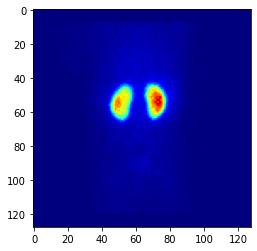

In [21]:
import matplotlib.pyplot as plt
plt.imshow(arr, cmap='jet') 

Exercice :
----------
- Retrouver les dimensions de l'image et sa résolution

In [22]:
dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 212
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Nuclear Medicine Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.184.21753.172177051.1554192655.109687500
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113619.6.184
(0002, 0013) Implementation Version Name         SH: 'Xeleris 2.1753'
(0002, 0016) Source Application Entity Title     AE: 'XELERIS-MED'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 528
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'STATIC', 'EMISSION']
(0008, 0012) Instance Creation Date              DA: '20190402'
(0008, 0013) Instance Creation Time              TM: '101108.0000'
(0008, 

In [23]:
print(dataset.Rows, dataset.Columns)
print(dataset.PixelSpacing)

128 128
[3.451684, 3.451684]


In [24]:
print(dataset.RadiopharmaceuticalInformationSequence)

[(0018, 1071) Radiopharmaceutical Volume          DS: "0.0"
(0018, 1074) Radionuclide Total Dose             DS: "0.0"
(0054, 0300)  Radionuclide Code Sequence   1 item(s) ---- 
   (0008, 0100) Code Value                          SH: 'C-163A8'
   (0008, 0102) Coding Scheme Designator            SH: 'SNM3'
   (0008, 0104) Code Meaning                        LO: '^99m^Technetium'
   ---------]


## Modification de fichiers par lot
-----------
On peut aussi utiliser `pydicom` pour modififier certains tags d'une série de fichiers DICOM. Une utilisation potentielle est l'**anonymisation** de fichiers.

Les fichiers présents dans le répertoire `anonymized1` contiennent les fichiers d'examens d'un patient ayant bénéficié d'un TEP/TDM. Ces fichiers sont déjà anonymisés mais on va à nouveau modifier l'attribut `PatientName` comme on pourrait le faire pour anoymiser ces fichiers.

Exercice :
----------
- Combien de fichiers DICOM contient le répertoire `anonymized1` ?
- Combien de fichiers DICOM *PT* contient le répertoire `anonymized1` ?
- Combien de fichiers DICOM *CT* contient le répertoire `anonymized1` ?
- Créer un nouveau répertoire `test_M2` contenant les images DICOM pour lesquelles vous avez changé le nom du patient en `M2_2020`

In [25]:
import pydicom as dcm
from pathlib import Path

# La syntaxe suivante permet de rechercher une chaîne de caractères précise dans un liste de fichiers
dcm_files = Path('./data/anonymized1/').rglob('*.dcm')
dcm_files_CT = Path('./data/anonymized1/').rglob('*CT*.dcm')
dcm_files_PT = Path('./data/anonymized1/').rglob('*PT*.dcm')

# La fonction len() affiche la longueur d'une liste (donc ici le nombre de fichiers)
print('Nombre de fichiers total dans la série :',len(list(dcm_files)))
print('Nombre de fichiers TDM dans la serie :',len(list(dcm_files_CT)))
print('Nombre de fichiers TEP dans la serie :',len(list(dcm_files_PT)))

Nombre de fichiers total dans la série : 1690
Nombre de fichiers TDM dans la serie : 852
Nombre de fichiers TEP dans la serie : 838


In [26]:
# Liste contenant tous les fichiers DICOM du dossier anonymized1
dcm_files = Path('./data/anonymized1/').rglob('*.dcm')

# Création du nouveau répertoire test_M2 s'il n'existe pas (s'il existe, on ne fait rien)
output_dir = Path('./test_M2')
output_dir.mkdir(exist_ok=True)

# Boucle sur l'ensemble des fichiers DICOM du répertoire anonymized1
for file_dcm in dcm_files:
    if not 'new' in file_dcm.name:
        # Lecture de l'entête DICOM de chaque fichier
        ds = dcm.read_file(str(file_dcm))
        #print(ds.PatientName)
        # Les images DICOM de sortie (après anonymisation) auront le même nom
        out_file = file_dcm.name
        # Modification de l'attribut PatientName : DQPRM_2020 --> M2_2020
        ds.PatientName = "M2_2020"
        # Réécriture des nouveaux fichiers DICOM et stockage dans le dossier test_M2
        dcm.write_file(str(output_dir / out_file), ds)

In [27]:
# On vérifie que l'attribut PatientName a bien été modifié
newdcm_files = Path('./test_M2').rglob('*.dcm')
# Nom du patient après anonymisation
print("Nom du patient après anonymisation :",dcm.read_file(str(list(newdcm_files)[0])).PatientName)

Nom du patient après anonymisation : M2_2020


## Exemple d'opérations élementaires de traitement d'images utilisant l'entête DICOM
-----------

In [28]:
# SimpleITK est une librairie Python dédiée au traitement des images biomédicales
import SimpleITK as sitk

# Lecture de l'image au format DICOM
para =sitk.ReadImage('./data/PINHOLE_Tc99m001_DS.dcm')
# Conversion de l'image en un tableau pour pouvoir le manipuler
para_arr=sitk.GetArrayFromImage(para)
# Dimensions de l'image
print("Dimensions de l'image\t")
print(para_arr.shape)

Dimensions de l'image	
(2, 128, 128)


- Parcourir l'entête DICOM de cette image et trouver à quoi correspond la valeur **2**

In [29]:
ds = dcm.read_file('./data/PINHOLE_Tc99m001_DS.dcm')

In [30]:
print("Modalité de l'examen : ", ds.Modality)
print("Attributs image - nombre de lignes / colonnes (en pixels)")
print (ds[0x0028,0x0010])
print (ds[0x0028,0x0011])
print("Information sur le patient (nom, poids)")
print (ds[0x0010,0x0010])
print (ds[0x0008,0x1030])
print("Information sur l'acquisition")
print (ds[0x0008,0x1010])
print (ds[0x0008,0x1030])
print (ds[0x0009,0x1010])
print (ds[0x0010,0x1030])
print (ds[0x0010,0x0030])
print(ds[0x0018,0x1242])
print(ds[0x0054,0x0022][0][0x0018,0x1180])
print(ds[0x0054,0x0022][0][0x0018,0x1181])
# If you want to extract and display a specific DICOM tag value 
print("For instance, to only extract the Study Name value: ",ds[0x0009,0x1010].value)
# Print all DICOM tags
print(ds)

Modalité de l'examen :  NM
Attributs image - nombre de lignes / colonnes (en pixels)
(0028, 0010) Rows                                US: 128
(0028, 0011) Columns                             US: 128
Information sur le patient (nom, poids)
(0010, 0010) Patient's Name                      PN: 'PARATHYROIDE^FEMME^^^'
(0008, 1030) Study Description                   LO: 'PARATHYROIDES DOUBLE ISOTOPES : IMAGES'
Information sur l'acquisition
(0008, 1010) Station Name                        SH: 'INFINIA'
(0008, 1030) Study Description                   LO: 'PARATHYROIDES DOUBLE ISOTOPES : IMAGES'
(0009, 1010) [Study Name]                        LO: 'Parathyroide Pin'
(0010, 1030) Patient's Weight                    DS: "78.0"
(0010, 0030) Patient's Birth Date                DA: '19430101'
(0018, 1242) Actual Frame Duration               IS: "600000"
(0018, 1180) Collimator/grid Name                SH: 'PIN-HOLE'
(0018, 1181) Collimator Type                     CS: 'PINH'
For instance, to only

In [31]:
# La librairie SimpleITK dispose d'un certain nombre de fonctions pour retrouver les attributs image
print("Nombre de pixels total : ",para.GetNumberOfPixels())
print("Taille de l'image : ",para.GetSize())
print("Résolution spatiale (voxel size): ",para.GetSpacing())
print("Détails de l'image : ",para.GetWidth(),para.GetHeight(),para.GetDepth())
print("Dimension de l'image : ",para.GetDimension())
print("Profondeur de l'image (nombre de composantes): ",para.GetNumberOfComponentsPerPixel())

Nombre de pixels total :  32768
Taille de l'image :  (128, 128, 2)
Résolution spatiale (voxel size):  (2.209078, 2.209078, 1.0)
Détails de l'image :  128 128 2
Dimension de l'image :  3
Profondeur de l'image (nombre de composantes):  1


- La réponse se trouve dans un autre attribut DICOM : `NumberOfEnergyWindows`

In [32]:
print("Nombre de fenêtres en énergie : ",ds.NumberOfEnergyWindows)
print("IMPORTANT - selon le tag propriétaire suivant :")
print(ds[0x0011,0x100d])
print("La première image correspond au premier traceur, marqué au 99mTc (MIBI-Tc)")
print("Le second traceur utilisé est l'iode 123")

Nombre de fenêtres en énergie :  2
IMPORTANT - selon le tag propriétaire suivant :
(0011, 100d) [Radio Nuclide Name]                LO: 'Tc99m+I123[140 and 159]'
La première image correspond au premier traceur, marqué au 99mTc (MIBI-Tc)
Le second traceur utilisé est l'iode 123


- On extrait l'information correspondant à chaque traceur et on la stocke dans deux tableaux différents

In [33]:
para_t1 = sitk.GetArrayFromImage(para)[0]
para_t2 = sitk.GetArrayFromImage(para)[1]

- Affichage des images et de leur histogramme

(1.0, 200.0)

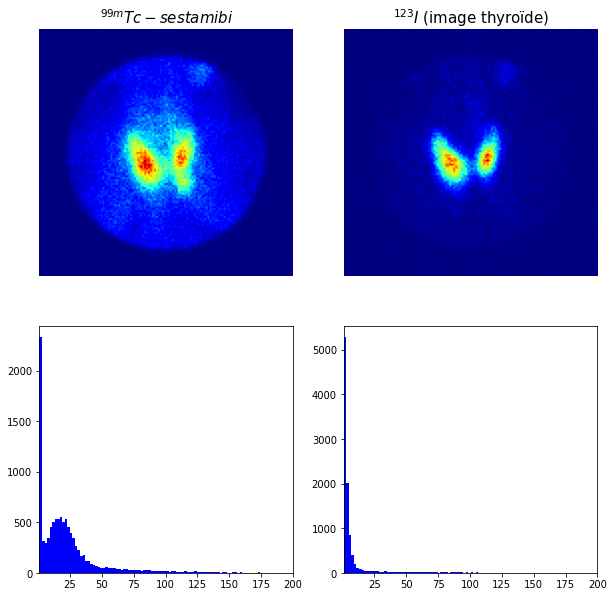

In [34]:
plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(para_t1,aspect='auto',cmap='jet')
plt.axis('off')
plt.title("$^{99m}Tc-sestamibi$",fontsize=15)
plt.subplot(2,2,2)
plt.imshow(para_t2,aspect='auto',cmap='jet')
plt.axis('off')
plt.title("$^{123}I$ (image thyroïde)",fontsize=15)
plt.subplot(2,2,3)
plt.hist(para_t1.flatten(),bins=100, range=(1,200), histtype='bar', color='blue') 
plt.xlim(1,200)
plt.subplot(2,2,4)
plt.hist(para_t2.flatten(),bins=100, range=(1,200), histtype='bar', color='blue') 
plt.xlim(1,200)

- Le traitement de l'information issue de cette modalité d'imagerie est basé sur la soustraction digitale des images recueillies avec les deux isotopes.

- Selon les activités injectées, selon l'état de la thyroïde du patient et de sa iodémie, les images sestamibi et thyroïde peuvent avoir des intensités très différentes. 

- Il faut donc préablement **ajuster les intensités** des deux images avant de soustraire l'image thyroïde à l'image sestamibi en calculant leur ratio.

In [35]:
# Somme cumulée de toutes les valeurs du tableau correspondant au traceur 99mTc-MIBI
# On récupère le dernier élément de ce tableau grâce à l'indicie -1
para_t1_sum=para_t1.cumsum()[-1]
# Même chose pour le tableau correspondant à l'iode 123
para_t2_sum=para_t2.cumsum()[-1]
# Calcul du ratio
para_t1t2_ratio=para_t1_sum/para_t2_sum
print(para_t1_sum,para_t2_sum,para_t1t2_ratio)

230815 66799 3.455366098294885


- Calcul de l'image de soustraction : `99mTc-sestamibi - iode 123`

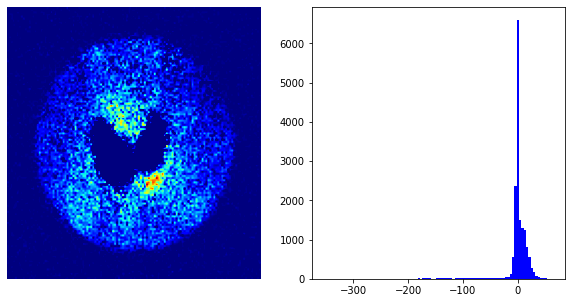

In [36]:
# Calcul de l'image de soustraction 
soustract=para_t1-para_t1t2_ratio*para_t2
# Affichage de l'image de soustraction et de son histogramme
plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(soustract,vmin=0,vmax=soustract.max(),aspect='auto',cmap='jet')
plt.axis('off')
plt.subplot(1,2,2)
plt.hist(soustract.flatten(),bins=100, range=(soustract.min(),soustract.max()), histtype='bar', color='blue') 
plt.show()